##### To use a Support Vector Machine (SVM) for anomaly detection, start by loading and cleaning the dataset to ensure data quality. Next, select key features that are indicative of anomalies and split the dataset into training and testing portions. Applying feature scaling to normalize data dimensions is crucial for SVM performance. Train the SVM model with appropriate kernel functions and parameters. Finally, the model will be evaluated using precision, recall, and the F1-score, and its performance will be visualized with a confusion matrix. This structured approach ensures the SVM model effectively identifies anomalies, balancing detection accuracy and model reliability.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import OneClassSVM

Precision: 0.886
Recall: 0.880
F1 Score: 0.879
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7442
           1       0.94      0.80      0.86      6558

    accuracy                           0.88     14000
   macro avg       0.89      0.87      0.88     14000
weighted avg       0.89      0.88      0.88     14000



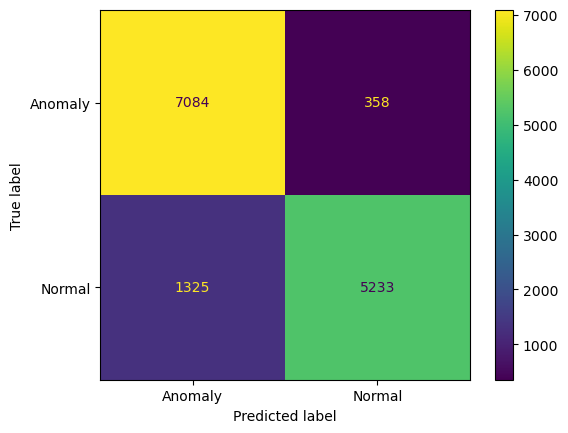

In [27]:

def anomaly_detection_svm():
    # Load the dataset
    
    # Load data from a CSV file   
    data1 = pd.read_csv('MetroPT3.csv')
    
    data = data1.sample(n=70000, random_state=5)
    
    data = data.drop(['timestamp'], axis=1)
    data.dropna(axis=0, how='all', inplace=True)
#     data.dropna(axis=1, how='all', inplace=True)
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
        
#     data.info()
    
    
    #convert all the values in the columns into numeric
    for column in data.columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
    
    X = data.drop('Reservoirs', axis=1)  # Assuming 'label' is your target column
    y_cont = data['Reservoirs']
#     y = data['Reservoirs']

    # First, binarize `y` based on a chosen threshold.
    y = np.where(y_cont > 9, 1, 0)  # Define `threshold` based on the dataset

    # Select top k features; you might adjust k based on your dataset
    selector = SelectKBest(f_classif, k=10)
    X_selected = selector.fit_transform(X, y)
    
    # Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
     # Initialize One-Class SVM
    # Note: nu should be an estimate of the proportion of outliers
    oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
    # Fit the model on the training data
    # Note: One-Class SVM is typically trained only on the normal data (label 0)
    oc_svm.fit(X_train_scaled[y_train == 0])
#     oc_svm.fit(X_train_scaled)
    
    # Predict on the test data
    y_pred = oc_svm.predict(X_test_scaled)
    # Convert predictions to match the original label (1 for normal, -1 for anomaly)
    y_pred = np.where(y_pred == 1, 0, 1)
    
    # Evaluate the final outcome
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1 Score: {f1:.3f}')
    
    print(classification_report(y_test, y_pred))
    
    
    # Use a confusion matrix for visualization of the outcome
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomaly', 'Normal'])
    disp.plot()
    plt.show()


anomaly_detection_svm()